In [ ]:
##### IE261 2022F TERM PROJECT - TEAM KAI1Q #####
#### TEAM MEMBER ####
## 20200045 김건우 | KAIST EE | kzwoo@kaist.ac.kr
## 20210240 박수민 | KAIST CS | alicesoomin@kaist.ac.kr
## 20210297 서성재 | KAIST ISysE | sj.seo@kaist.ac.kr
## 20220311 박하윤 | 새내기과정학부 | stella0826@kaist.ac.kr
## 20220886 이동규 | School of Freshman | oh470102@kaist.ac.kr

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
X_exam = pd.read_csv('/content/drive/MyDrive/dsc_data/X_exam.csv') #for test
Y_all = pd.read_csv('/content/drive/MyDrive/dsc_data/Y_model.csv') #for train
X_all = pd.read_csv('/content/drive/MyDrive/dsc_data/X_model.csv') #for train

# Data preprocessing

In [ ]:
col_cst = [c for c in df1.columns] #list
#col_cst.remove('business')
col_cst.remove('gender')
col_cst.remove('age_code')
col_cst.remove('region_code')

In [ ]:
df1 = pd.concat([X_all,X_exam], axis=0)
df1.head()

,gender,age_code,region_code,c20220101,c20220102,c20220103,c20220104,c20220105,c20220106,c20220107,...,t20220817,t20220818,t20220819,t20220820,t20220821,t20220822,t20220823,t20220824,t20220825,t20220826
0,1,13,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1,5,1,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,6,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_col_cst = pd.DataFrame(col_cst)
df_col_c = df_col_cst[df_col_cst[0].str.contains('c',na = False)]
df_col_s = df_col_cst[df_col_cst[0].str.contains('s',na = False)]
df_col_t = df_col_cst[df_col_cst[0].str.contains('t',na = False)]

In [ ]:
col_c = df_col_c[0].tolist()
col_s = df_col_s[0].tolist()
col_t = df_col_t[0].tolist()

In [ ]:
df_c = df1[col_c]
df_s = df1[col_s]
df_t = df1[col_t]

In [ ]:
for c in col_c:
    df_c.rename(columns = {c:c[1:]},inplace =True)
for s in col_s:
    df_s.rename(columns = {s:s[1:]},inplace =True)
for t in col_t:
    df_t.rename(columns = {t:t[1:]},inplace =True)

In [ ]:
df_c.head()

df_c.fillna(0,inplace =True)
df_s.fillna(0,inplace =True)
df_t.fillna(0,inplace =True)

In [ ]:
c = df_c.values
t = df_t.values
s = df_s.values

In [ ]:
df_c = pd.DataFrame(c)
df_t = pd.DataFrame(t)
df_s = pd.DataFrame(s)
df_c.fillna(0, inplace = True)
df_t.fillna(0, inplace = True)
df_s.fillna(0, inplace = True)

In [ ]:
remain_col = []
for i in range(1,35):
    remain_col.append('c'+str(i))
for j in range(1,35):
    remain_col.append('t'+str(j))
for j in range(1,35):
    remain_col.append('s'+str(j))

In [ ]:
a = np.zeros((1000000,102))
df_pro = pd.DataFrame(a,columns = remain_col)

In [ ]:
b=[]
for i in range(238):
   b.append(i)
df_c.columns = b
df_t.columns = b
df_s.columns = b

In [ ]:
for i in range(34):
    for j in range(7):
        df_pro[remain_col[i]]+= df_c[i*7+j]
    for k in range(7):
        df_pro[remain_col[34+i]]+=df_t[i*7+k]
    for q in range(7):
        df_pro[remain_col[68+i]]+=df_s[i*7+q]

In [ ]:
df1.index = df_pro.index

In [ ]:
info_col = ['gender','age_code','region_code']

In [ ]:
df2 = df1[info_col].copy()
df2.head()

,gender,age_code,region_code
0,1,13,7
1,1,5,1
2,2,6,2
3,2,1,1
4,2,5,1


In [ ]:
df3 = pd.concat([df2, df_pro], axis = 1)
df3.head()

,gender,age_code,region_code,c1,c2,c3,c4,c5,c6,c7,...,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34
0,1,13,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0
1,1,5,1,1.0,0.0,1.0,0.0,1.0,0.0,3.0,...,59.0,64.0,7.0,31.0,12.0,74.0,12.0,0.0,65.0,75.0
2,2,6,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1649.0,0.0,63.0,0.0,145.0,258.0,114.0
3,2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,5,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 72 kB 618 kB/s 


In [ ]:
# for Target Encoder
import category_encoders as ce

df_prepro = df3.copy()

for i in range(len(df_prepro['region_code'])):
    df_prepro['region_code'][i]='a'+str(df_prepro['region_code'][i]) # 이렇게 안하면 categorical로 Target encoder가 인식을 못함
    df_prepro['age_code'][i]='a'+str(df_prepro['age_code'][i]) # 동일

In [ ]:
def split_train_exam(X_combined, n):
    X_task = X_combined.iloc[:n,:]
    X_exam = X_combined.iloc[n:,:]
    return X_task, X_exam


In [ ]:
X_task1, X_exam1 = split_train_exam(df_prepro, 800000)

In [ ]:
TE1 = ce.TargetEncoder()
X_task1['region_code'] = TE1.fit_transform(X_task1['region_code'],Y_all['business'])
X_exam1['region_code'] = TE1.transform(X_exam1['region_code'])


TE2 = ce.TargetEncoder()
X_task1['age_code'] = TE2.fit_transform(X_task1['age_code'],Y_all['business'])
X_exam1['age_code'] = TE2.transform(X_exam1['age_code'])

In [ ]:
X_all = pd.concat([X_task1,X_exam1], axis = 0)

In [ ]:
X_all.head()

,gender,age_code,region_code,c1,c2,c3,c4,c5,c6,c7,...,s25,s26,s27,s28,s29,s30,s31,s32,s33,s34
0,1,0.063545,0.077748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0
1,1,0.051589,0.068776,1.0,0.0,1.0,0.0,1.0,0.0,3.0,...,59.0,64.0,7.0,31.0,12.0,74.0,12.0,0.0,65.0,75.0
2,2,0.076324,0.065031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1649.0,0.0,63.0,0.0,145.0,258.0,114.0
3,2,0.000000,0.068776,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.051589,0.068776,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Task1 & 2 & 3

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import classification_report, confusion_matrix


def model_perf(model, X, Y, prefix=''):
    p_hat = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(Y, p_hat)
    print (f'{prefix} AUROC score = {auc:.3f}')

    Yhat = model.predict(X)
    print(f"{prefix} Classfication report:")
    print(classification_report(Y, Yhat))

# note : cross validation is not included because of computation time
def model_fit_perf(model, X_all, Y_all, prefix=''):
    X_trn, X_val, Y_trn, Y_val = train_test_split(X_all, Y_all, test_size=0.2, random_state=4)
    model.fit(X_trn, Y_trn)
    print (prefix)
    model_perf(model, X_trn, Y_trn, '  Training  ')
    model_perf(model, X_val, Y_val, '  Validation')

In [ ]:
X_task1, X_exam1 = split_train_exam(X_all, 800000)

In [ ]:
lgbm = lightgbm.LGBMClassifier(boosting_type='dart', num_leaves = 31, learing_rate = 0.01, objective ='binary', num_iterations = 1000, metric = 'binary_logloss',verbose=-1, class_weight={0:1, 1:15})
model_fit_perf(lgbm, X_task1, Y_all, "LightGBM")

LightGBM
  Training   AUROC score = 0.911
  Training   Classfication report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    598182
           1       0.20      0.93      0.32     41818

    accuracy                           0.75    640000
   macro avg       0.59      0.83      0.58    640000
weighted avg       0.94      0.75      0.81    640000

  Validation AUROC score = 0.879
  Validation Classfication report:
              precision    recall  f1-score   support

           0       0.99      0.73      0.84    149501
           1       0.19      0.87      0.31     10499

    accuracy                           0.74    160000
   macro avg       0.59      0.80      0.57    160000
weighted avg       0.94      0.74      0.80    160000



threshold: 0.502618536916201


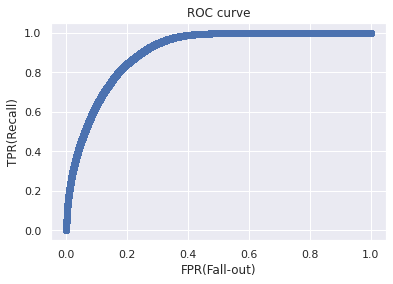

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# roc_curve(타겟값, prob of 1) 그래프 그리기

p_hat = lgbm.predict_proba(X_task1)[:, 1]
Yhat = lgbm.predict(X_task1)

fpr, tpr, thresholds = roc_curve(Y_all, p_hat)


roc = pd.DataFrame({ 'FPR(Fall-out)': fpr, 'TPRate(Recall)': tpr, 'Threshold': thresholds})

plt.scatter(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('FPR(Fall-out)')
plt.ylabel('TPR(Recall)');
optimal_idx = np.argmax(tpr-fpr)
optimal_threshold = thresholds[optimal_idx]
print('threshold:', optimal_threshold)

In [ ]:
submission = pd.read_csv('/content/drive/MyDrive/dsc_data/submission.csv')
Y_exam_proba = lgbm.predict_proba(X_exam1)[:,1]

submission['business_prob'] = Y_exam_proba


In [ ]:

submission['business_prob']

0         0.172822
1         0.018478
2         0.298326
3         0.035733
4         0.085618
            ...   
199995    0.564711
199996    0.753381
199997    0.042281
199998    0.356591
199999    0.006850
Name: business_prob, Length: 200000, dtype: float64

In [ ]:
# task2
threshold = 0.08
for i in range(len(Y_exam_proba)):
    if Y_exam_proba[i] >= threshold : submission['popup'][i] = 1
    else : submission['popup'][i] = 0

In [ ]:
# task3
threshold_task3 = 0.5093
for i in range(len(Y_exam_proba)):
    if Y_exam_proba[i] >= threshold_task3: submission['survey'][i] = 1
    else : submission['survey'] = 0

In [159]:
del_column = df_col_c[0][:212].tolist() + df_col_t[0][:].tolist() +  df_col_s[0][:].tolist()

X_task3_1 = X_task3.drop(del_column,axis=1)


In [137]:
X_task3_1['nacheck']= X_task3_1.isna().sum(axis=1)

del_column_8 = df_col_c[0][212:].tolist()
X_task3_2 = X_task3_1.drop(del_column_8, axis=1)

In [138]:
X_task3_2

,gender,age_code,region_code,nacheck
0,2,4,4,25
1,2,10,15,26
2,2,4,2,23
3,1,8,1,26
4,2,8,2,26
...,...,...,...,...
199995,2,6,7,25
199996,1,10,6,19
199997,1,11,1,21
199998,1,4,16,25


In [146]:
a = np.zeros((200000,1))
b = np.zeros((200000,1))
na_thr = pd.DataFrame(a, columns = ['na_threshold'])
prob_thr = pd.DataFrame(a, columns = ['prob_threshold'])

X_task3_2 = pd.concat([X_task3_2,na_thr,prob_thr], axis = 1)


In [152]:
na_threshold = 24
for i in range(len(Y_exam_proba)):
    if X_task3_2['nacheck'][i] >= na_threshold : X_task3_2['na_threshold'][i] = 0
    else :  X_task3_2['na_threshold'][i] = 1

In [153]:
threshold_task3 = 0.5093
for i in range(len(Y_exam_proba)):
    if Y_exam_proba[i] >= threshold_task3: X_task3_2['prob_threshold'][i] = 1
    else : X_task3_2['prob_threshold'][i] = 0

In [154]:
X_task3_2['candidate'] = X_task3_2['na_threshold'] * X_task3_2['prob_threshold']

submission['survey'] = X_task3_2['candidate'].astype(int)

In [156]:
submission.head()

,business_prob,popup,survey
0,0.172822,1,0
1,0.018478,0,0
2,0.298326,1,0
3,0.035733,0,0
4,0.085618,1,0


In [158]:
submission['survey'].sum()

49238

In [160]:
submission.to_csv('/content/drive/MyDrive/dsc_data/submission_kai1q.csv')